In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle

In [2]:
with open('/home/lhertel/projects/physicsprojects/nova/simple/predictions/electron_event_energy_scaled_0_1800.pkl', 'r') as f:
    results = pickle.load(f)

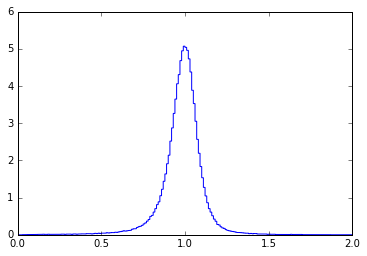

In [3]:
fig, axes = plt.subplots()
hist = axes.hist(results['resolution'], bins=200, normed=1, range=(0,2), histtype='step')

In [4]:
with open('/home/lhertel/projects/physicsprojects/nova/simple/predictions/electron_event_energy_scaled_with_pretraining_olddata.pkl', 'r') as f:
    results_scaled = pickle.load(f)

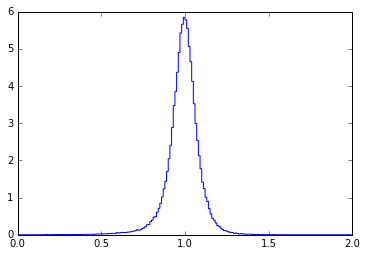

In [5]:
fig, axes = plt.subplots()
hist = axes.hist(results_scaled['resolution'], bins=200, normed=1, range=(0,2), histtype='step')

In [6]:
dat = np.load('/home/lhertel/projects/physicsprojects/nova/main/predictions/electron_event_new_401to500.npy')
true_e = dat[:,0]
pred_e = dat[:,1]
sh_e = dat[:, 2]
nn_resolution = pred_e/true_e
sh_resolution = sh_e/true_e
print true_e.shape
print pred_e.shape

(136119,)
(136119,)


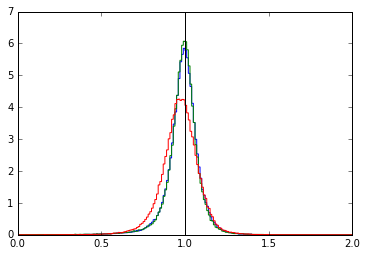

In [64]:
fig, axes = plt.subplots()
hist = axes.hist(results_scaled['resolution'], bins=200, normed=1, range=(0,2), histtype='step', color='b')
hist = axes.hist(results['resolution'], bins=200, normed=1, range=(0,2), histtype='step', color='g')
# hist = axes.hist(nn_resolution, bins=200, normed=1, range=(0,2), histtype='step', color='g')
# hist = axes.hist(test_resolution, bins=200, normed=1, range=(0,2), histtype='step', color='cyan')
hist = axes.hist(sh_resolution, bins=200, normed=1, range=(0,2), histtype='step', color='red')
axes.plot((1,1), (0,7), color='k')

In [8]:
results['yhat']

['y', 'yhat', 'resolution']

# Using Vertex

In [9]:
import h5py

In [12]:
with h5py.File('/baldig/physicsprojects/nova/data/lars/vertex/electron_event_vertices_500_592.h5') as f:
    vertices = f['data'][...]

In [17]:
with h5py.File('/baldig/physicsprojects/nova/data/lars/electron_event_energy/electron_event_energies_500_592.h5') as f:
    y = f['data'][...]

In [28]:
print vertices.shape
print results['y'].shape
print y.shape

(151193, 3)
(151168, 1)
(151193, 1)


In [24]:
for i in range(151168):
    if y[i]!=results['y'][i]:
        break
print i

151167


(75584, 4)

In [38]:
train_input = np.hstack([np.atleast_2d(results['yhat'][:75584]), vertices[:75584]])
train_output = results['y'][:75584]
test_input = np.hstack([np.atleast_2d(results['yhat'][75584:151167]), vertices[75584:151167]])
test_output = results['y'][75584:151167]

In [48]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [59]:
model = Sequential()
# model.add(Dense(10, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, input_dim=4, kernel_initializer='normal'))
model.compile(loss='mean_absolute_percentage_error', optimizer='adam')

In [60]:
model.fit(train_input, train_output, validation_data=(test_input, test_output), epochs=5)

Train on 75584 samples, validate on 75583 samples
Epoch 1/5
75584/75584 [==============================] - 12s - loss: 20.7963 - val_loss: 6.9940
Epoch 2/5
75584/75584 [==============================] - 13s - loss: 6.9842 - val_loss: 6.9820
Epoch 3/5
75584/75584 [==============================] - 11s - loss: 6.9829 - val_loss: 6.9763
Epoch 4/5
75584/75584 [==============================] - 11s - loss: 6.9849 - val_loss: 6.9797
Epoch 5/5
75584/75584 [==============================] - 12s - loss: 6.9836 - val_loss: 6.9781


In [61]:
test_pred = model.predict(test_input)

In [62]:
test_resolution = test_pred/test_output